### Imports & Options

In [277]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [278]:
%autoreload 2

In [279]:
import random
import pickle
from copy import copy

In [280]:
from PIL import Image, ImageDraw
from rtree import index
import networkx as nx
import matplotlib.pyplot as plt

In [281]:
import sys
sys.path.append("../src")

In [282]:
from stippling import Stipple
from optimize import Optimize

# from ant_manager import Optimize
# from ant import Ant
# from plotting_tools import Analyze
# from utils import window

### Stippling

In [283]:
filename = "../images/ame.png"
lite_stippling = Stipple(original_filename = filename)
lite_stippling.place_dots(20)

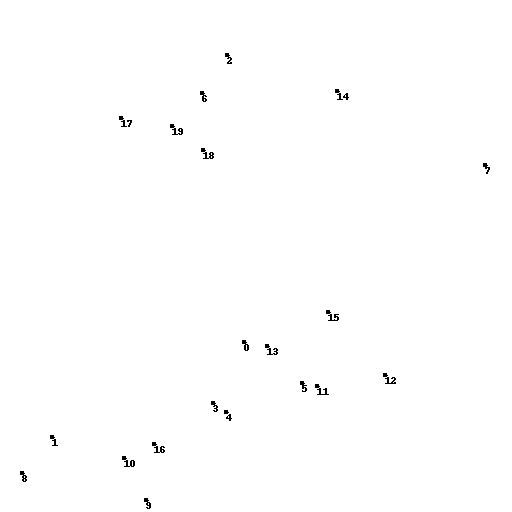

In [284]:
lite_stippling.draw_points(radius=2, include_ids=True)

### Ants

**Notes**
* On a graph of 20 nodes there are 190 edges.

In [300]:
optimization = Optimize(lite_stippling.chosen_points, 
                        num_ants=20, 
                        evaporation_rate=0.5, 
                        alpha=0.2,
                        deposition_factor=6000)

The graph has 20 nodes and 190 edges.


In [301]:
optimization.optimize(num_iterations=500, convergence_overide=True)
# analyze = Analyze(optimization)

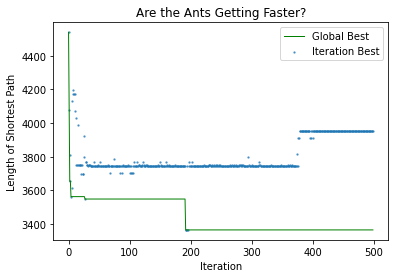

In [302]:
optimization.plot_convergence()

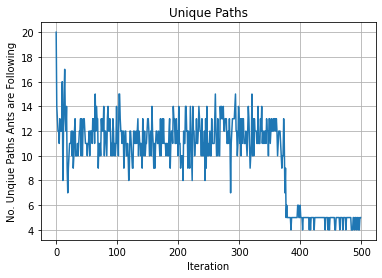

In [303]:
optimization.plot_unique_paths()

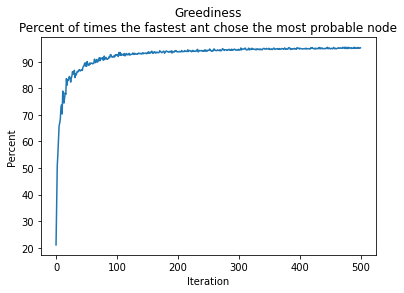

In [304]:
optimization.plot_greediness()

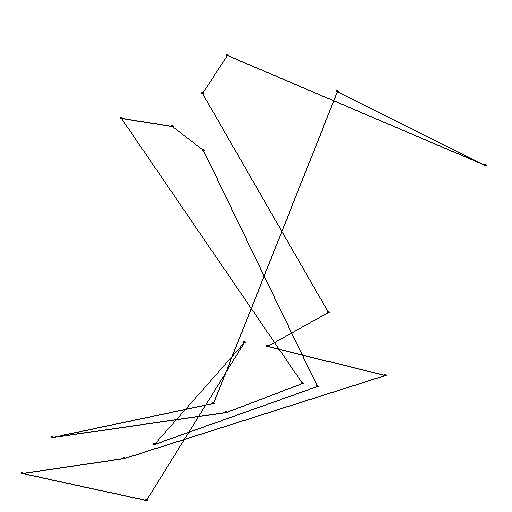

In [305]:
optimization.plot_path()

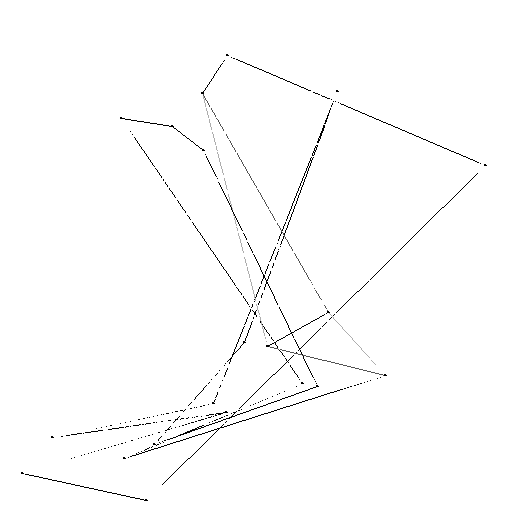

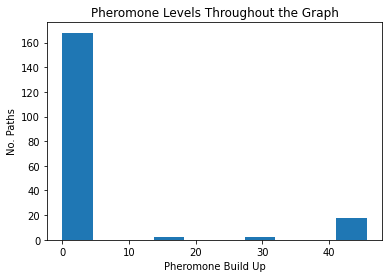

In [306]:
optimization.plot_graph()